In [5]:
import pandas as pd
data = pd.read_csv('C:/Users/regi_/Desktop/work/datamia0619/module-2/In-Class Lectures Mod2/fitbit2.csv')

In [10]:
data.shape

(367, 24)

In [11]:
data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [37]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
X = pd.DataFrame(data= data, columns=['MinutesOfBeingAwake'])
Y = pd.DataFrame(data= data, columns=['NumberOfAwakings'])
model = lm.fit(X,Y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
lm.score(X,Y) #how much of the data is captured in the model. Rsquared gives the accuracy of the model

0.9059552749155962

In [39]:
lm.intercept_

array([0.72898957])

In [40]:
lm.coef_

array([[0.55223862]])

In [41]:
predictions = lm.predict(X)

In [42]:
comparisons = pd.DataFrame(np.column_stack([Y, predictions]), columns = ['actual', 'predicted'])
comparisons.head()

,actual,predicted
0,23.0,15.087194
1,21.0,20.057341
2,25.0,26.131966
3,21.0,17.848387
4,44.0,36.624500


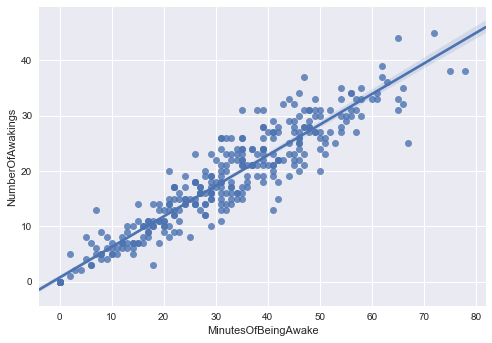

In [43]:
sns.regplot(x="MinutesOfBeingAwake", y="NumberOfAwakings", data=data) #scatterplot together with the regression line

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
mse = (mean_squared_error(Y, predictions))
print(mse)

10.853805417037568


In [45]:
r2_score(Y, predictions)

0.9059552749155962

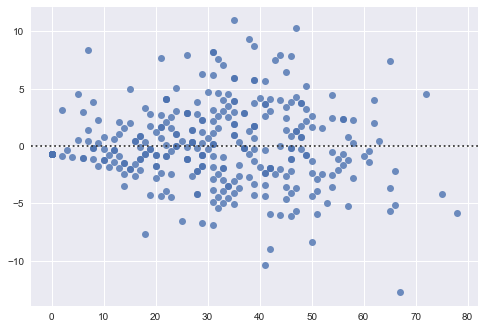

In [46]:
sns.residplot(X,Y) #error should not follow any particular pattern. Y axis are errors.

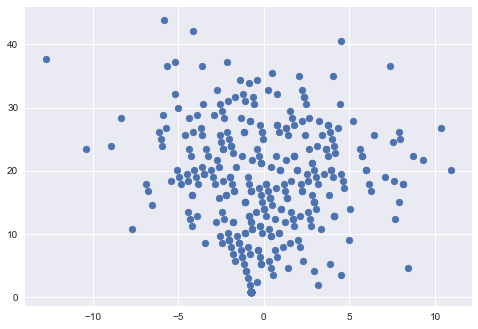

In [49]:
residuals = Y - predictions #x errors, y predictions. has to be random, no pattern
plt.scatter(residuals, predictions)

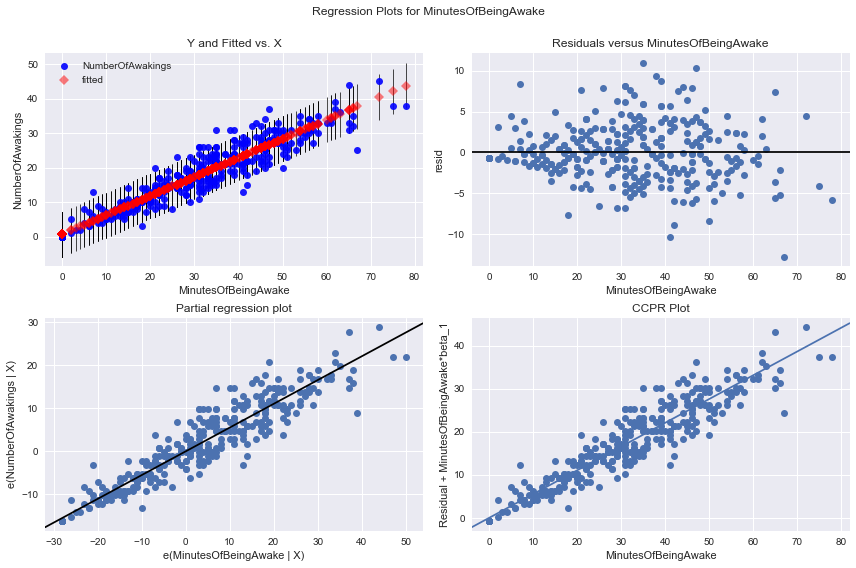

In [50]:
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn')
fig = plt.figure(figsize=(12,8))
model = ols("NumberOfAwakings~MinutesOfBeingAwake",data=fitbit).fit()
fig = sm.graphics.plot_regress_exog(model, "MinutesOfBeingAwake", fig=fig)

MULTIPLE LINEAR REGRESSION

In [51]:
Y = pd.DataFrame(data = data, columns = ['NumberOfAwakings'])
X = data[['MinutesOfBeingAwake', 'MinutesOfSleep', 'Activity Calories']]

In [52]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)

In [53]:
lm.score(X,Y)

0.9099214780402995

In [54]:
lm.intercept_

array([-0.15950337])

In [55]:
lm.coef_

array([[5.07549506e-01, 6.85473448e-03, 7.28877511e-05]])

In [56]:
predictions = lm.predict(X)

In [58]:
mse = mean_squared_error(Y, predictions)
mse

10.396061541223801

In [59]:

anova= anova_lm(model)
anova

NameError: name 'anova_lm' is not defined

In [60]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(data[['MinutesOfBeingAwake','MinutesOfSleep']])
transformer.transform(data[['MinutesOfBeingAwake','MinutesOfSleep']])

array([[0.33333333, 0.69439421],
       [0.44871795, 0.82097649],
       [0.58974359, 0.69981917],
       [0.3974359 , 0.56238698],
       [0.83333333, 0.73598553],
       [0.6025641 , 0.7323689 ],
       [0.35897436, 0.68896926],
       [0.43589744, 0.48643761],
       [0.33333333, 0.81735986],
       [0.21794872, 0.48643761],
       [0.11538462, 0.30198915],
       [0.64102564, 0.66546112],
       [0.38461538, 0.69801085],
       [0.58974359, 0.63471971],
       [0.41025641, 0.56781193],
       [0.44871795, 0.78119349],
       [0.30769231, 0.40506329],
       [0.        , 0.        ],
       [0.5       , 0.7034358 ],
       [0.30769231, 0.68896926],
       [0.84615385, 0.75406872],
       [0.44871795, 0.83905967],
       [0.67948718, 0.59312839],
       [0.69230769, 0.77034358],
       [0.52564103, 0.77757685],
       [0.58974359, 0.67992767],
       [0.56410256, 0.5641953 ],
       [0.26923077, 0.70162749],
       [0.71794872, 0.73960217],
       [0.69230769, 0.77034358],
       [0.

In [61]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(data[['MinutesOfBeingAwake','MinutesOfSleep']])
transformer.transform(data[['MinutesOfBeingAwake','MinutesOfSleep']]) 

array([[0.06755366, 0.99771564],
       [0.07686444, 0.99704155],
       [0.11803217, 0.99300977],
       [0.09918692, 0.99506882],
       [0.15770661, 0.98748601],
       [0.11527574, 0.99333353],
       [0.07329316, 0.99731044],
       [0.12539639, 0.99210672],
       [0.05742719, 0.9983497 ],
       [0.0630712 , 0.99800903],
       [0.05381412, 0.99855097],
       [0.13463255, 0.99089559],
       [0.07748653, 0.9969934 ],
       [0.12994298, 0.99152147],
       [0.1013857 , 0.99484719],
       [0.08075392, 0.99673407],
       [0.10653312, 0.99430915],
       [0.        , 0.        ],
       [0.09975697, 0.99501183],
       [0.06286752, 0.99802188],
       [0.15632745, 0.98770528],
       [0.07521735, 0.99716716],
       [0.15951631, 0.98719529],
       [0.12575426, 0.99206142],
       [0.09491834, 0.99548506],
       [0.12143503, 0.99259938],
       [0.13964384, 0.9902018 ],
       [0.05404461, 0.99853852],
       [0.13565368, 0.99075632],
       [0.12575426, 0.99206142],
       [0.

In [62]:
pd.Categorical(data['Months']).codes

array([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

In [64]:
data3 = data.copy()
pd.get_dummies(data3, columns=["Days"]).head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Yesterday_sleep_efficiency,Months,Months_encoded,Days_Friday,Days_Monday,Days_Saturday,Days_Sunday,Days_Thursday,Days_Tuesday,Days_Wednesday
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.000000,May,5,1,0,0,0,0,0,0
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,92.086331,May,5,0,0,1,0,0,0,0
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,92.464358,May,5,0,0,0,1,0,0,0
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,88.761468,May,5,0,1,0,0,0,0,0
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,88.857143,May,5,0,0,0,0,0,1,0


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
churnData = pd.read_csv('C:/Users/regi_/Desktop/work/datamia0619/module-2/lab-regression-analysis/Customer-Churn.csv')
numericData = churnData[['tenure','SeniorCitizen','MonthlyCharges']]
Y = pd.DataFrame(data=churnData, columns=['Churn'])
transformer = StandardScaler().fit(churnData[['tenure','SeniorCitizen','MonthlyCharges']])
scaled_x = transformer.transform(churnData[['tenure','SeniorCitizen','MonthlyCharges']])
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(scaled_x, churnData['Churn'])
classification.score(scaled_x, churnData['Churn'])

0.7911401391452506